In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [96]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343,0.410103
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957,0.554086
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000,2.000000


In [3]:
df.drop(columns=['ID#'],inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


<Axes: >

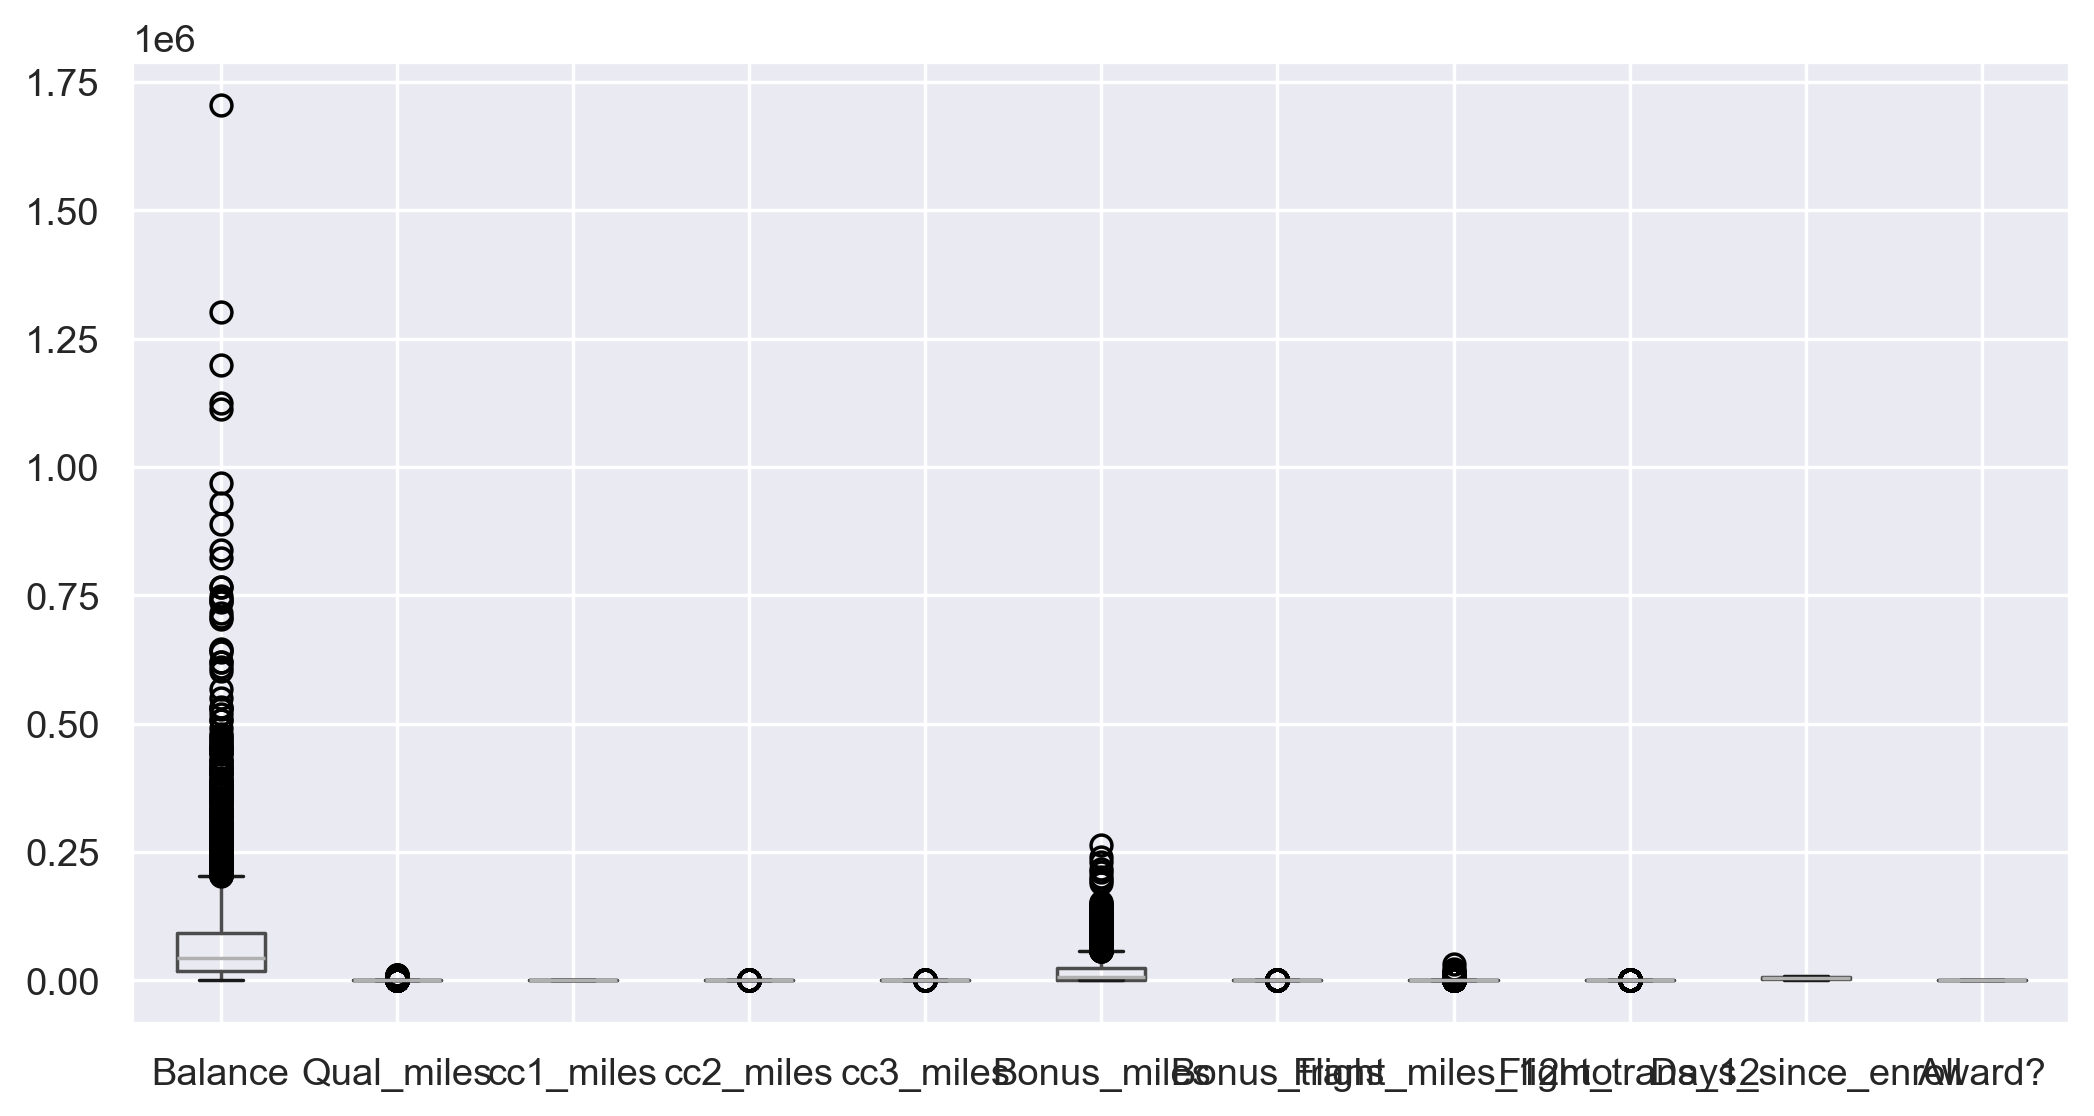

In [4]:
df.boxplot()

In [5]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

## Scaling the data as this is distance based clustering##

In [6]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

## creating dendrogram to check the possible number of clusters##

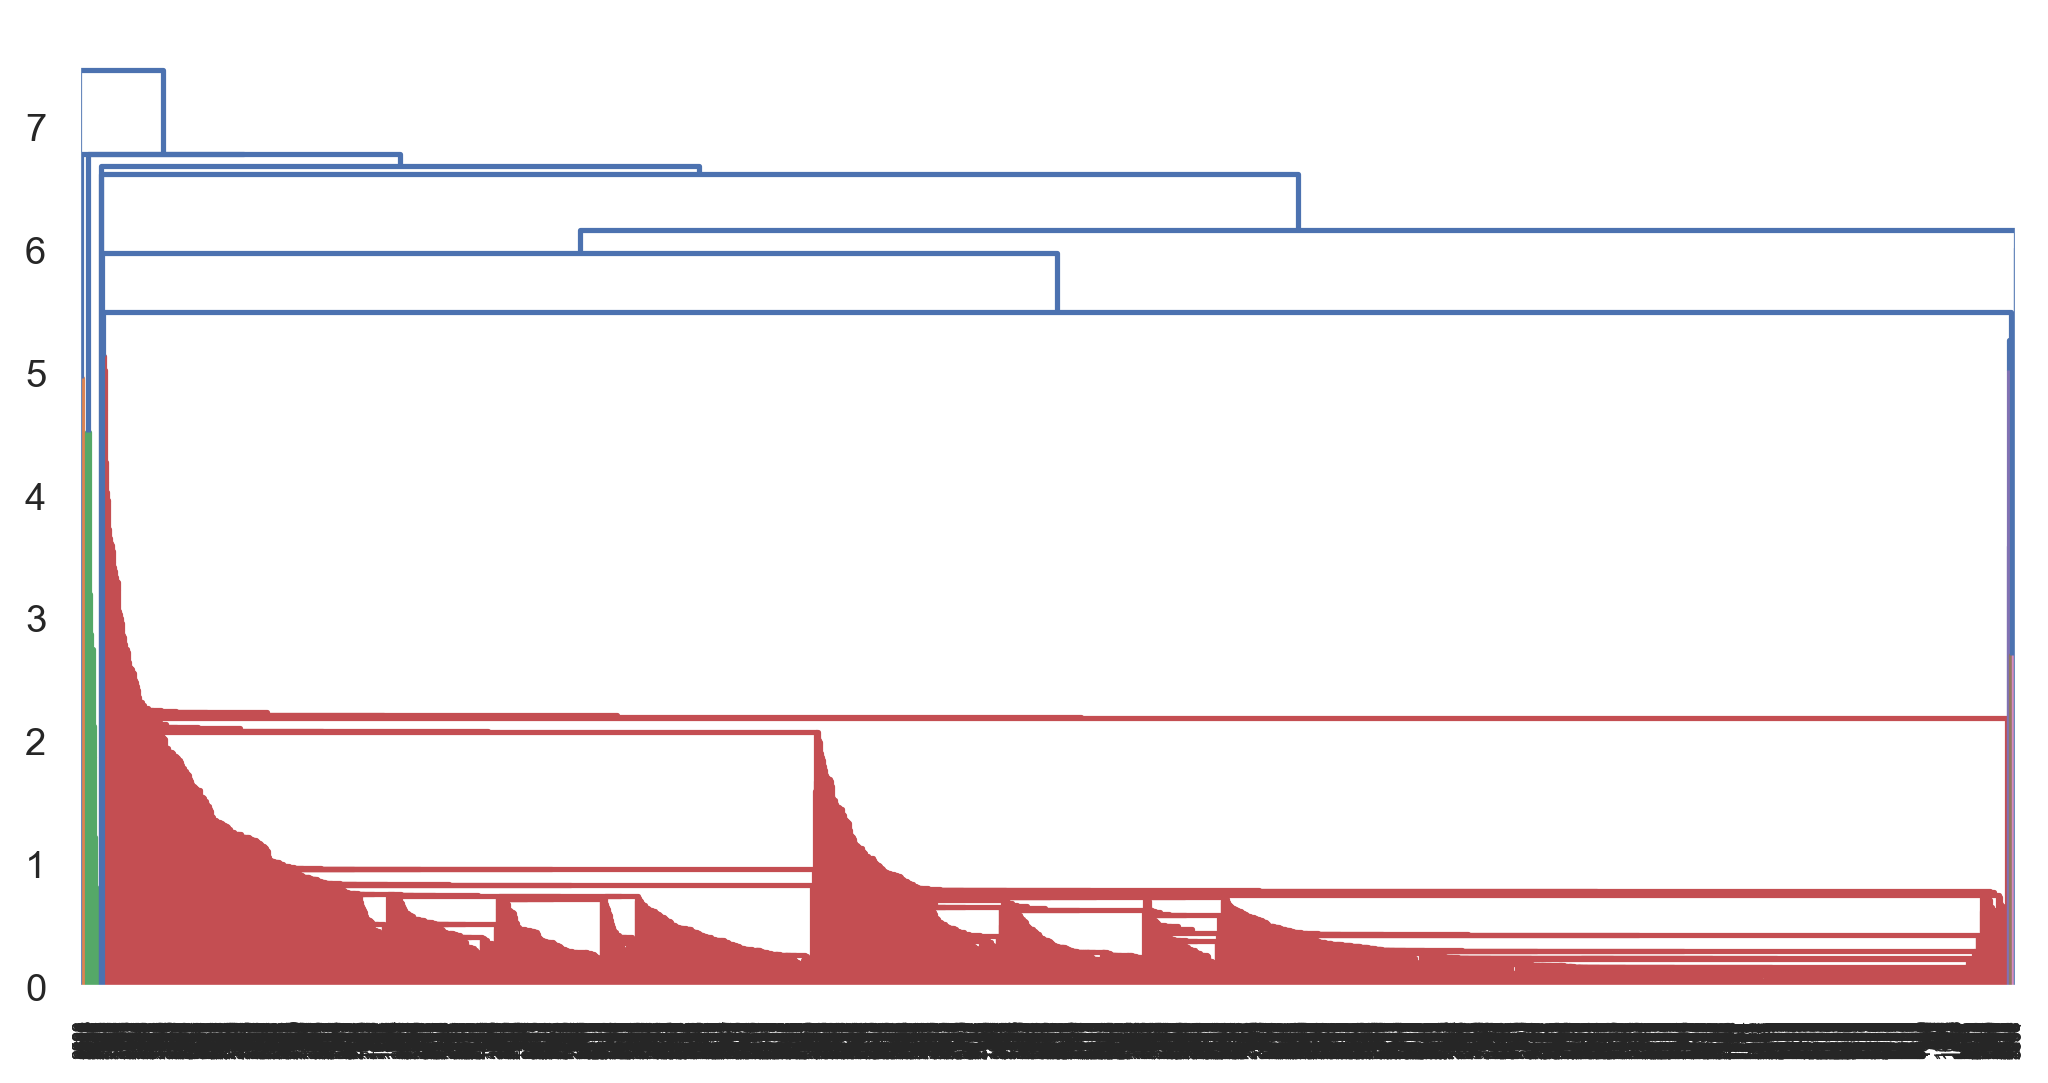

In [7]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

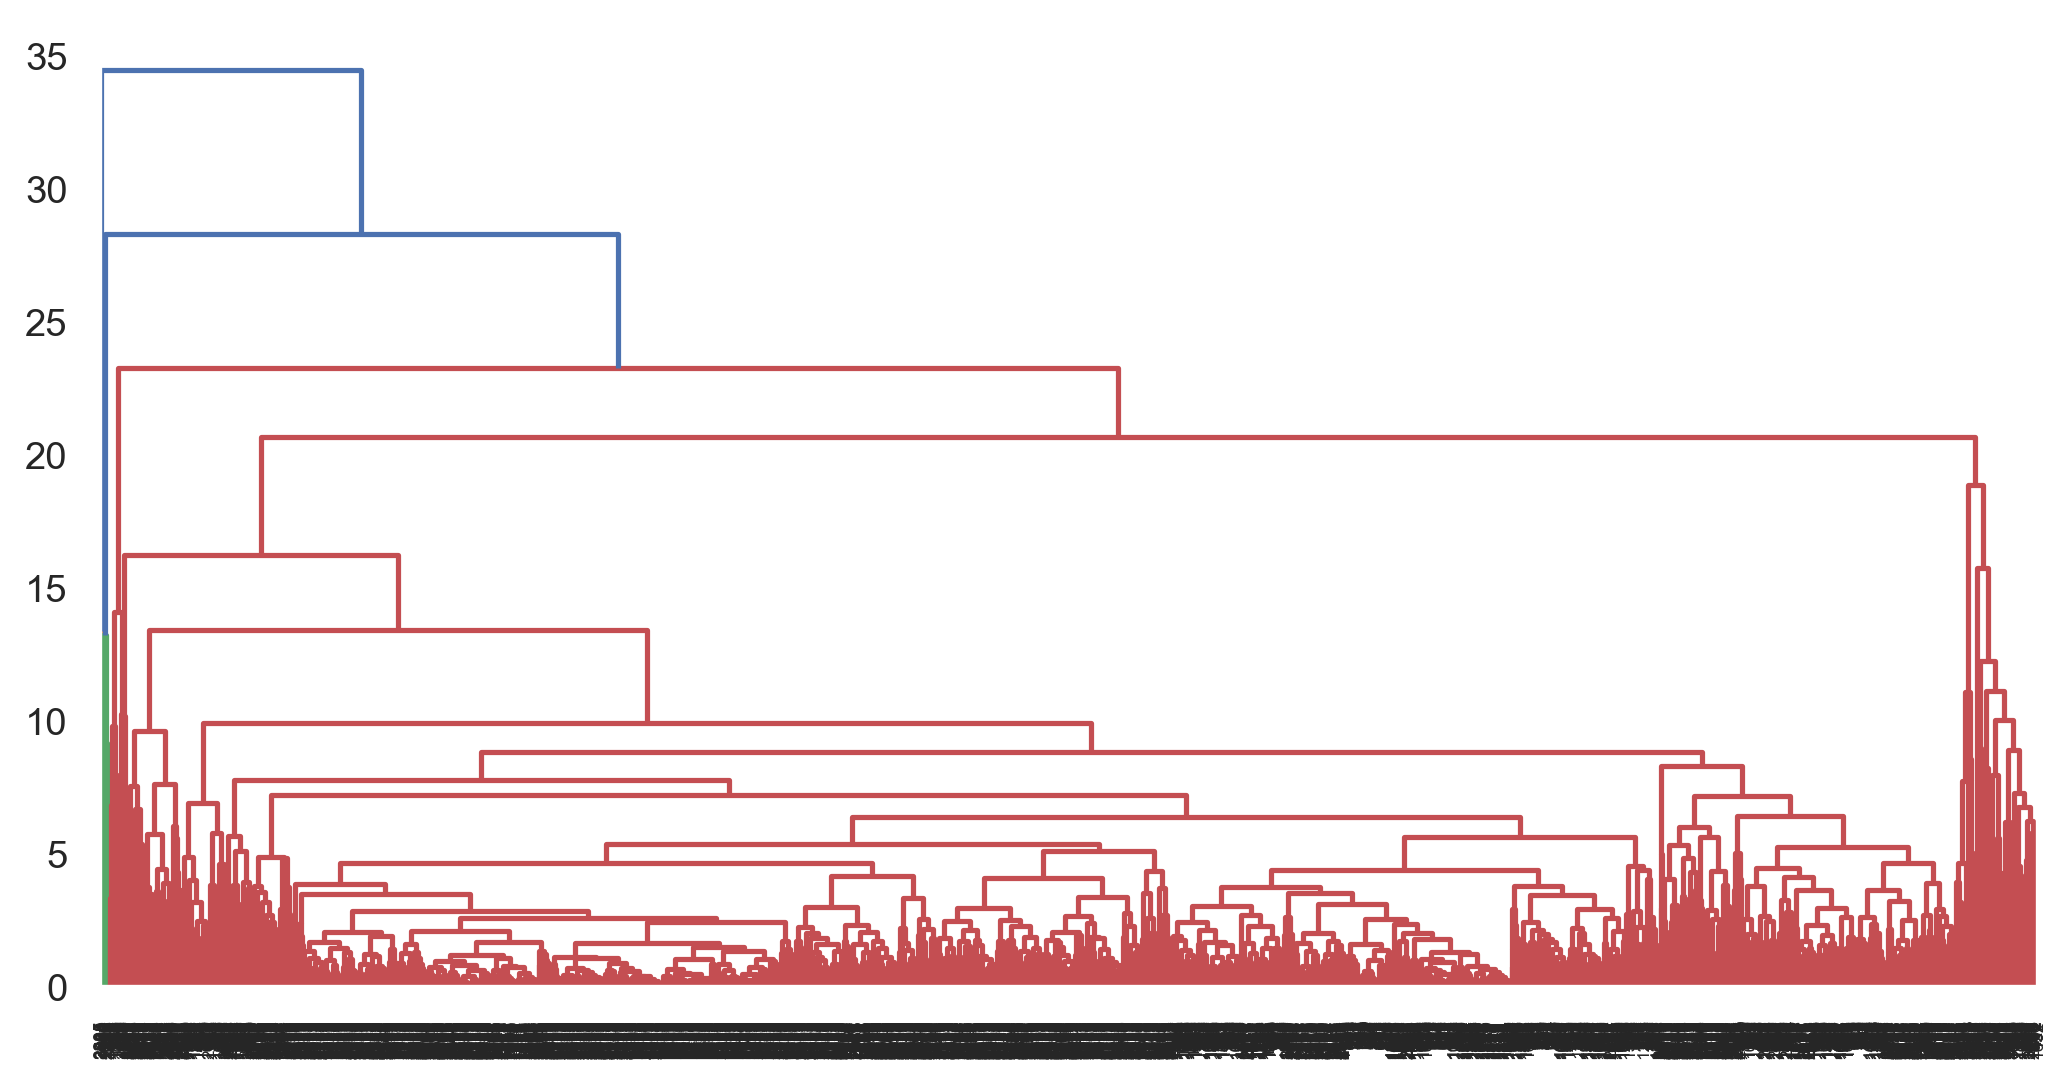

In [8]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

## Hierarchial Clustering ##

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
hc = AgglomerativeClustering(n_clusters=3)

ypred = hc.fit_predict(x)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
df['cluster'] = ypred
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [12]:
df.groupby('cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,46718.863399,9.274407,1.242266,1.023303,1.000000,5037.792688,7.091201,221.167135,0.700281,3772.785858,0.188027
1,116314.450725,363.839130,3.498551,1.000000,1.035507,37150.356522,18.066667,377.000000,1.150000,4696.888406,0.663043
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846


In [101]:
""" with hierarchial clustering no clear clusters can be defined in this case however on the basis of Balance
we can see the above 3 clusters"""

' with hierarchial clustering no clear clusters can be defined in this case however on the basis of Balance\nwe can see the above 3 clusters'

<Axes: xlabel='Balance', ylabel='Award?'>

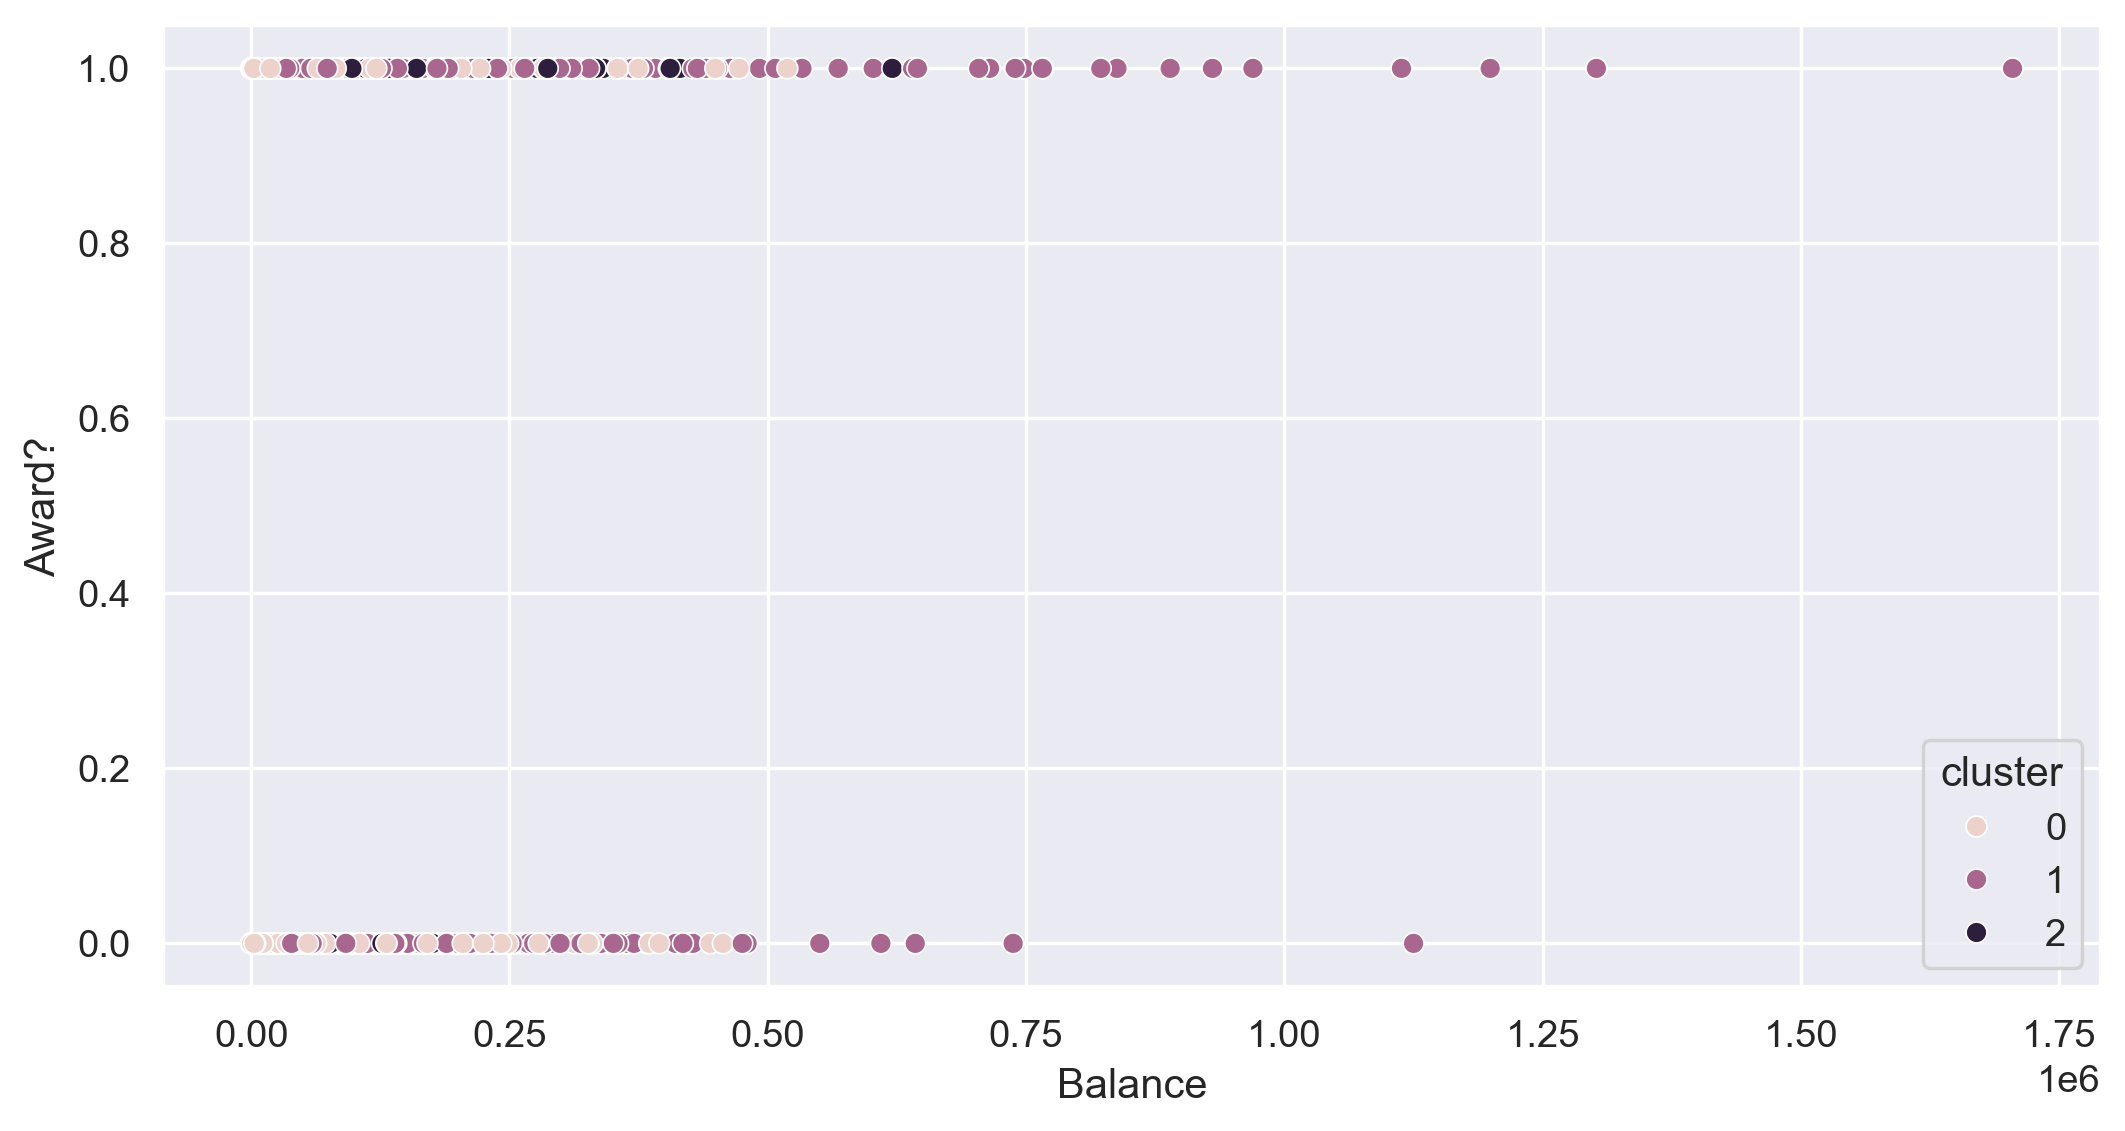

In [13]:
sns.scatterplot(x = df['Balance'], y = df['Award?'], hue = df['cluster'])

## K-means clustering ##

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([7, 7, 7, ..., 5, 1, 1])

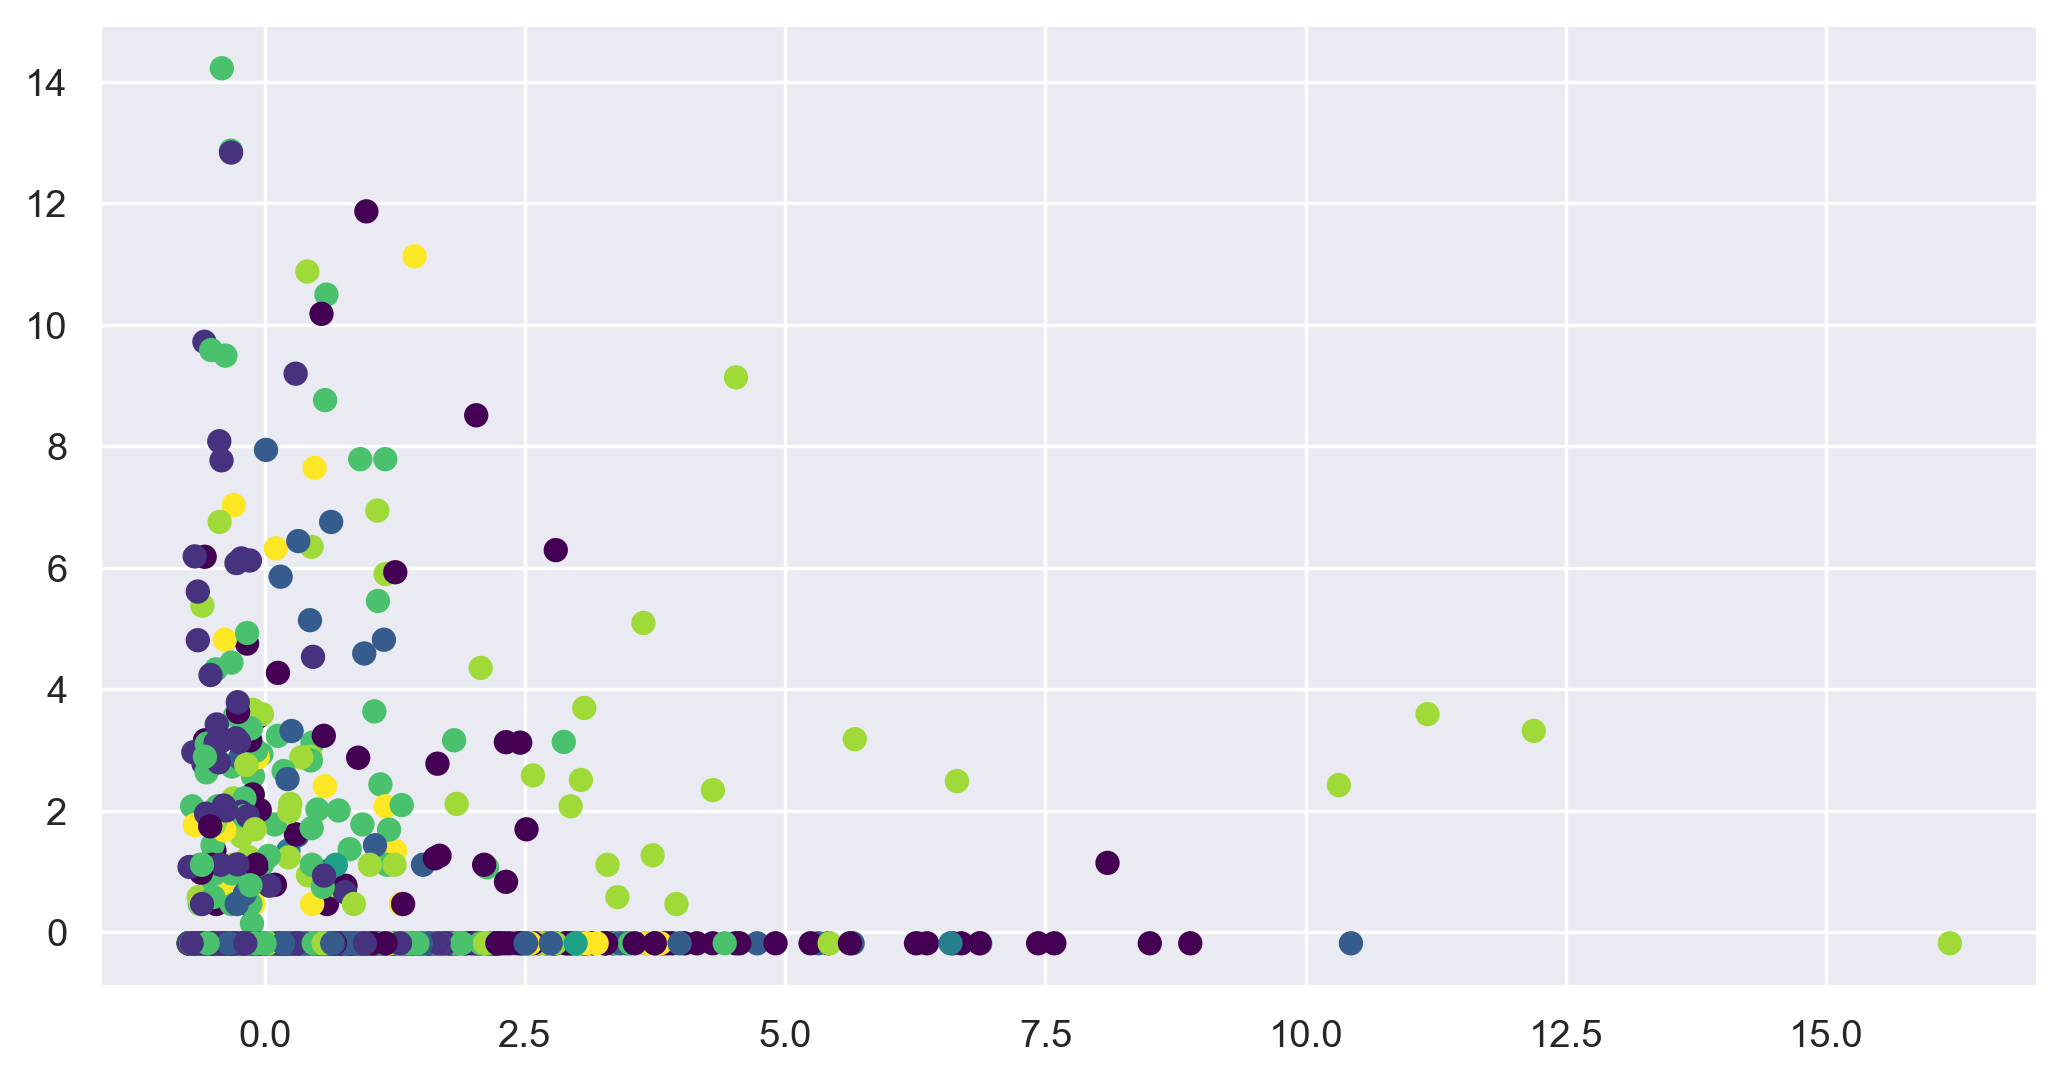

In [16]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='viridis')

In [17]:
wcss = []

for i in range(10,30):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

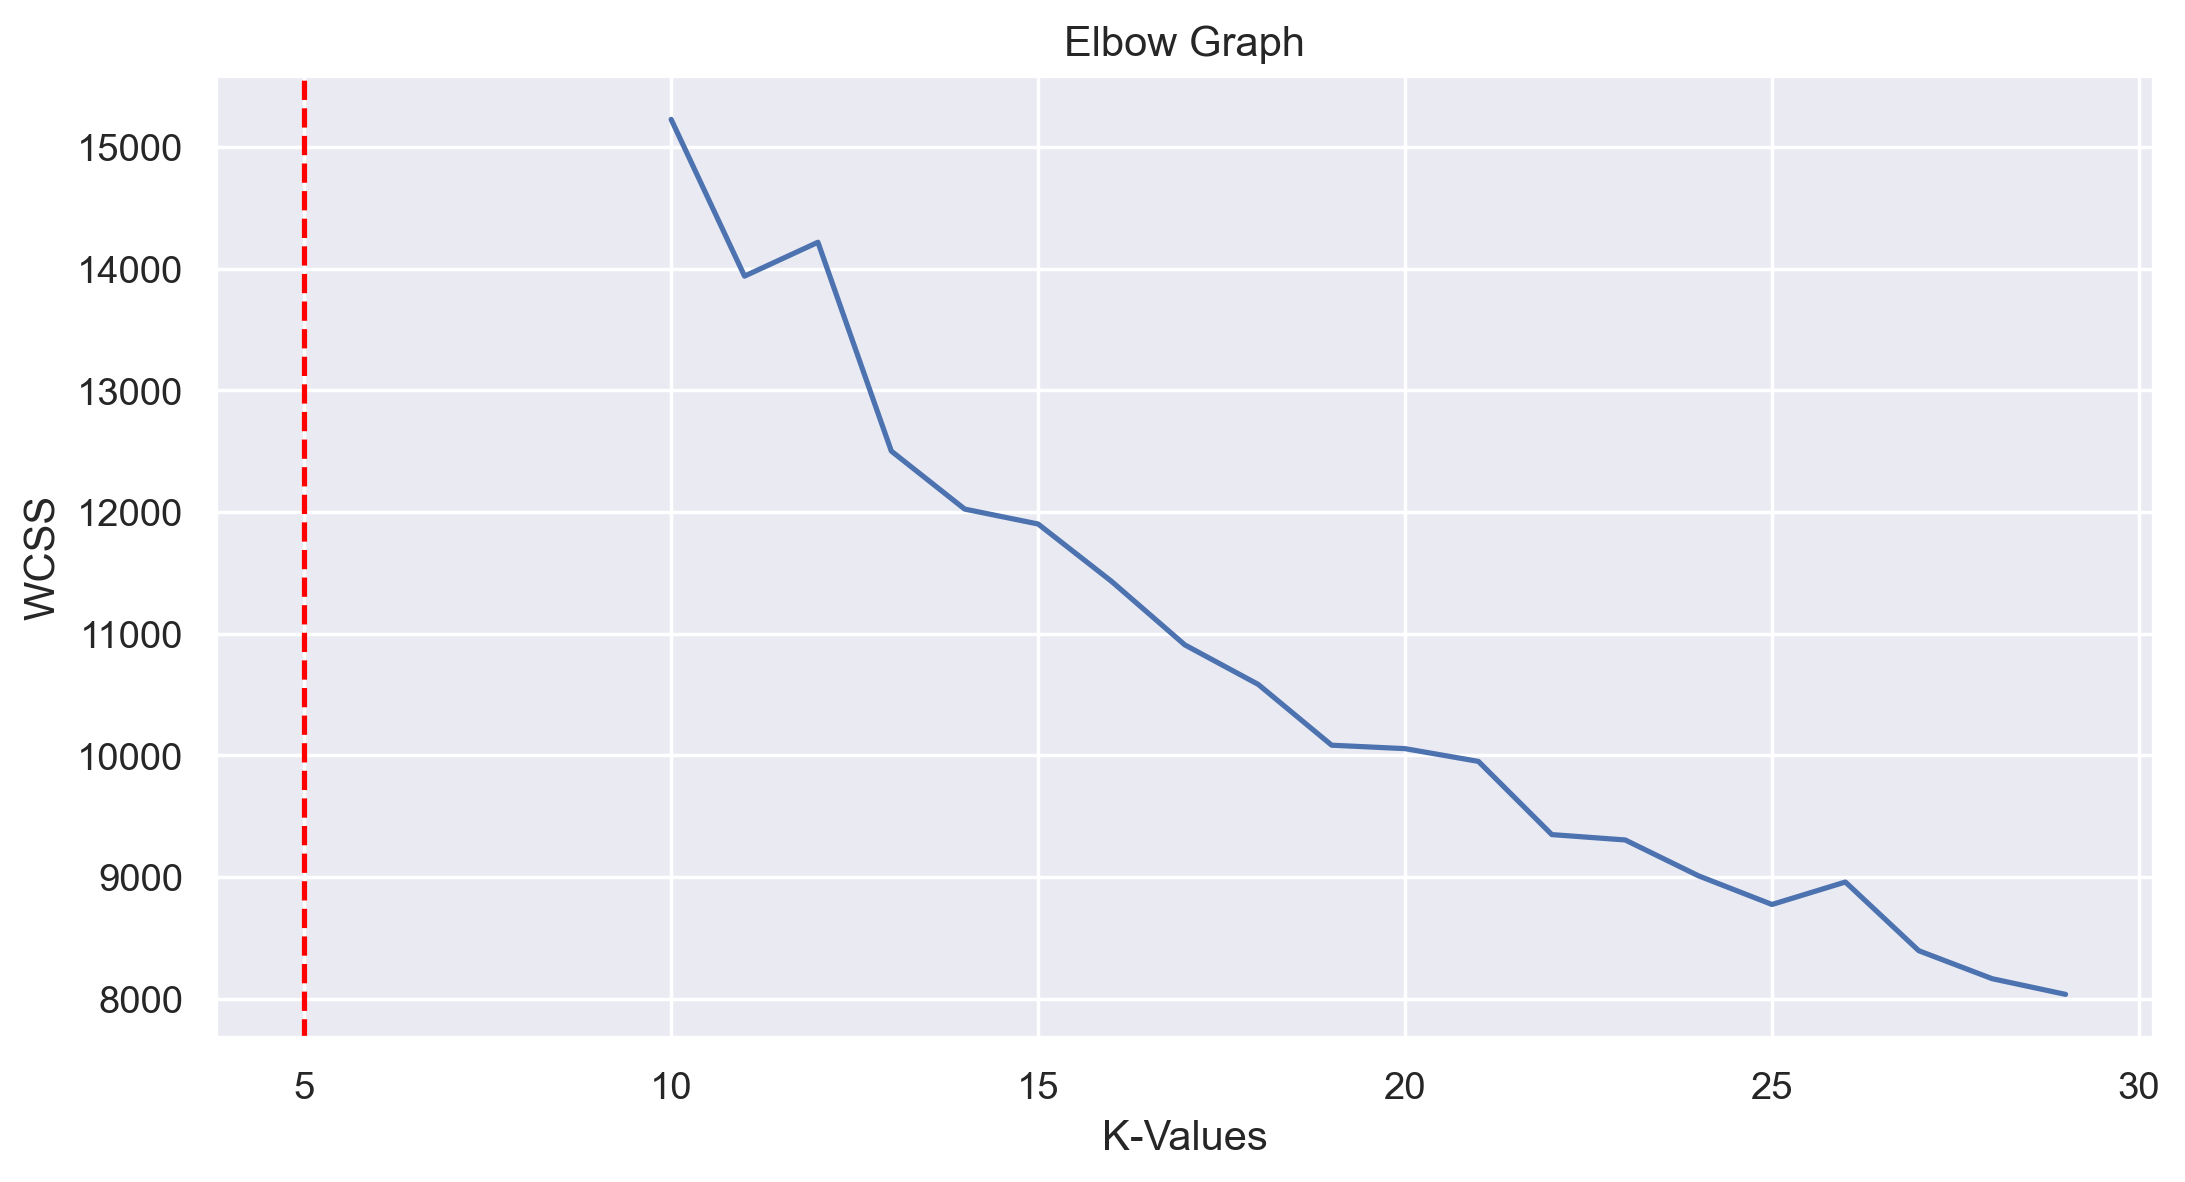

In [18]:
plt.plot(range(10,30),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [19]:
km = KMeans(n_clusters=20)
ypred = km.fit_predict(x)
ypred

array([11, 11, 11, ...,  1, 12, 12])

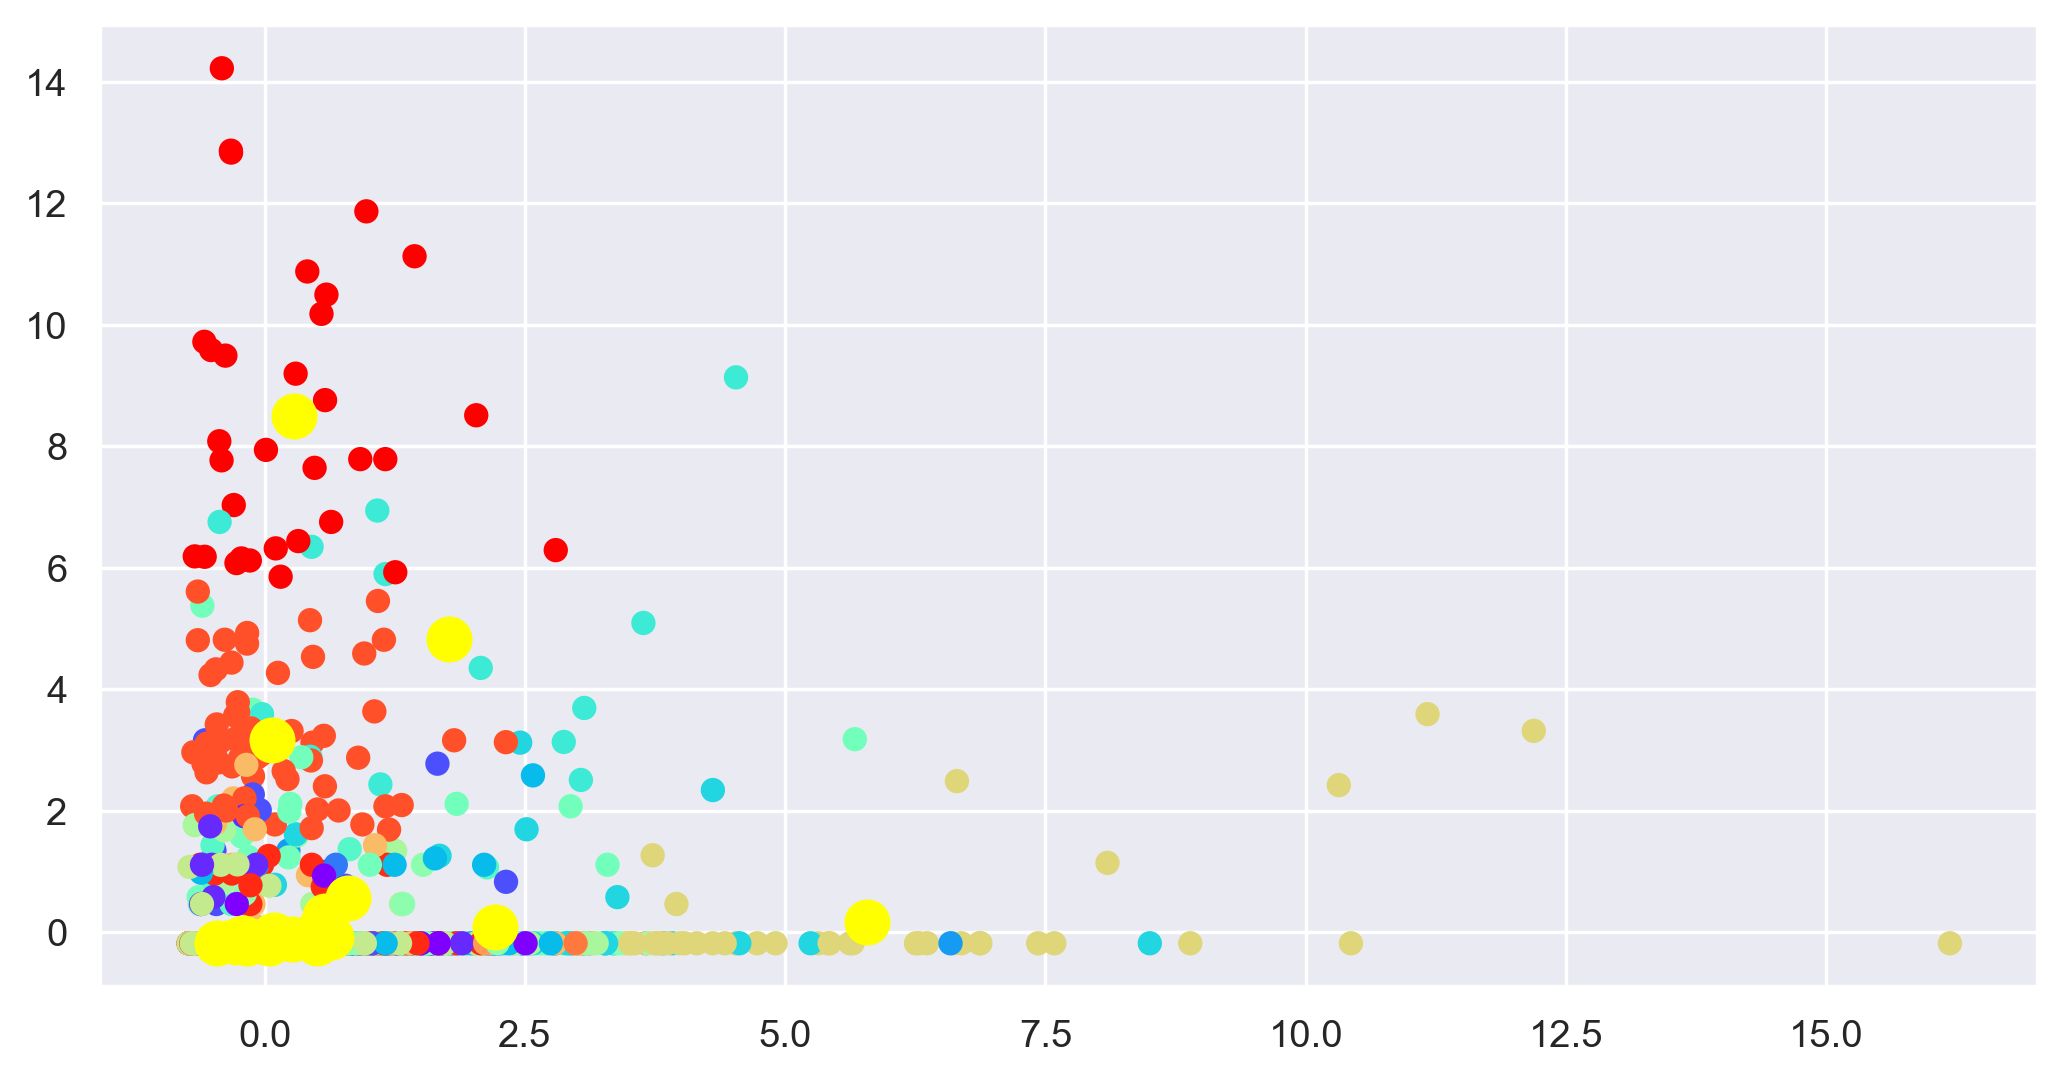

In [20]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_score(x,ypred)

0.27373264859946855

## Improving Silhoutte score using PCA method ##

In [23]:
from sklearn.decomposition import PCA

# Example: Applying PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

# Cluster the reduced data
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(x_reduced)
silhouette_avg = silhouette_score(x_reduced, cluster_labels)
print(f"The average silhouette score after PCA is: {silhouette_avg:.2f}")


The average silhouette score after PCA is: 0.55


## DBSCAN clustering ##

In [50]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([0, 0, 0, ..., 6, 0, 0], dtype=int64)

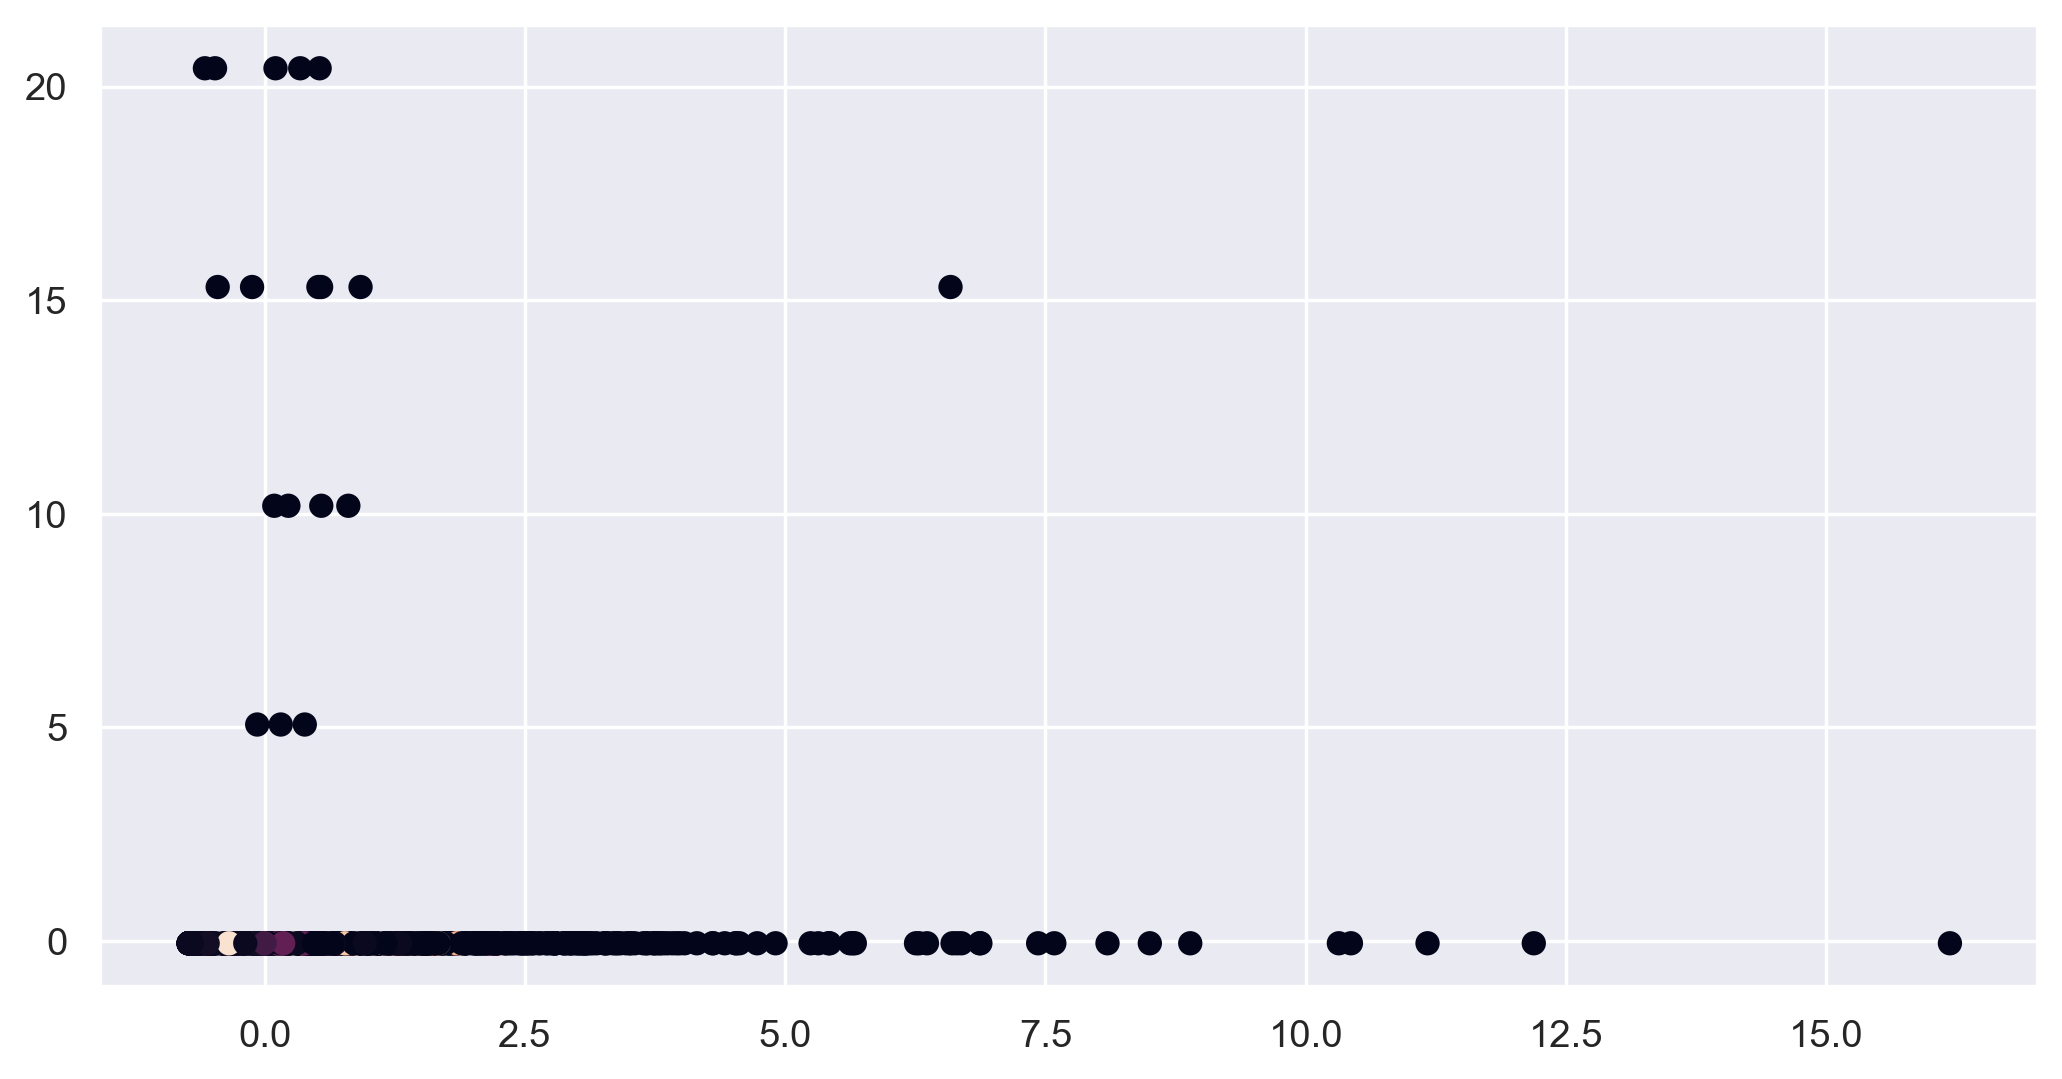

In [52]:
plt.scatter(x[:,0],x[:,4],c = y)

In [54]:
silhouette_score(x,y)

-0.11448578186172835

In [56]:
from sklearn.neighbors import NearestNeighbors

In [58]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [60]:
d,index = neigh.kneighbors(x)

In [66]:
distance = np.sort(d[:,1])
distance

array([0.00000000e+00, 0.00000000e+00, 2.26431613e-03, ...,
       6.61657940e+00, 6.67864158e+00, 7.46132314e+00])

Text(0.5, 1.0, 'K-Distance Graph')

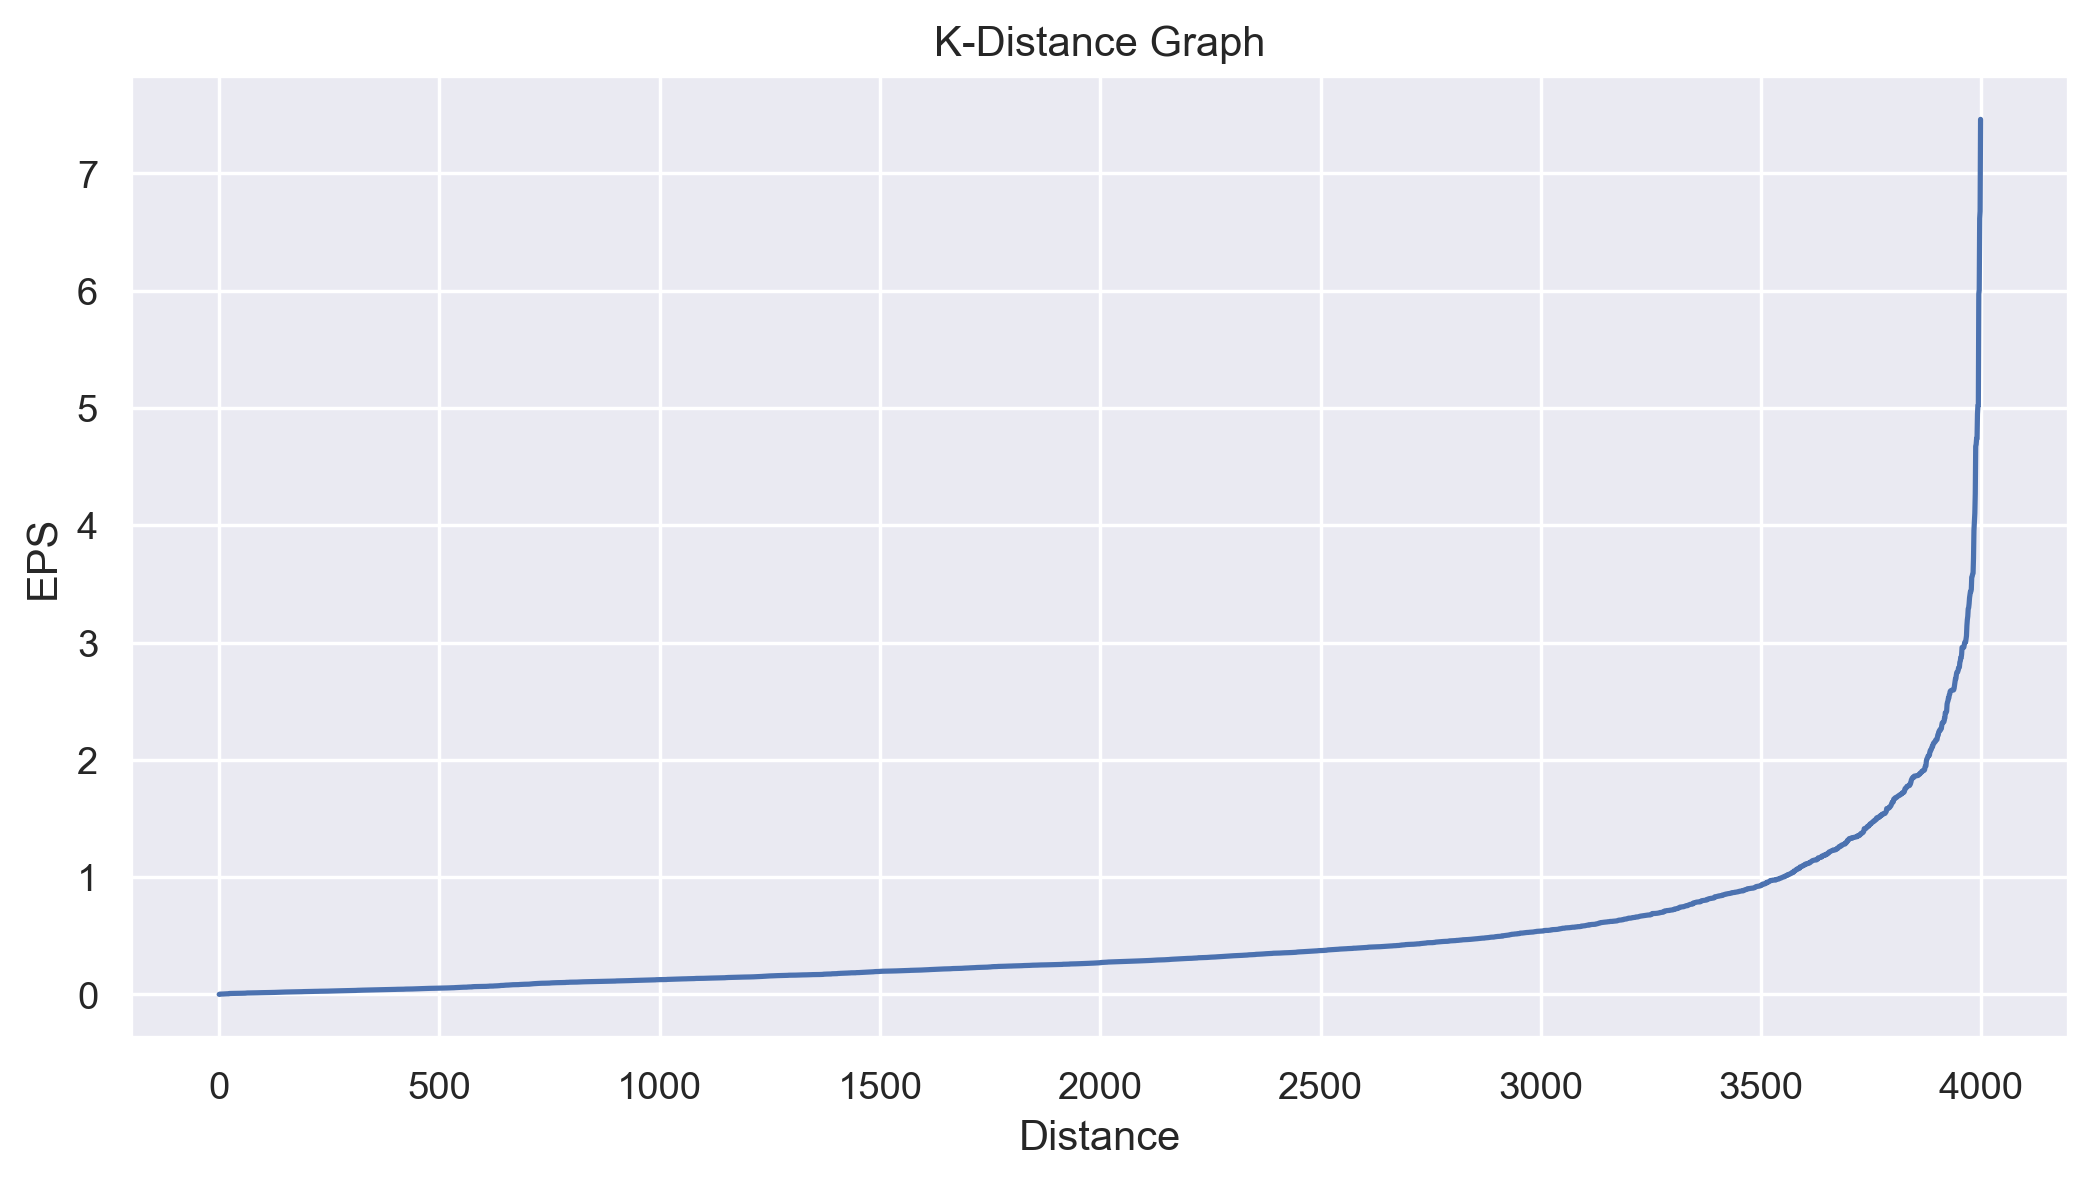

In [68]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [124]:
db = DBSCAN(eps=7,min_samples=3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
silhouette_score(x,yp)

0.8562820070415407

## Silhoutte score is improved after using eps=7 ##

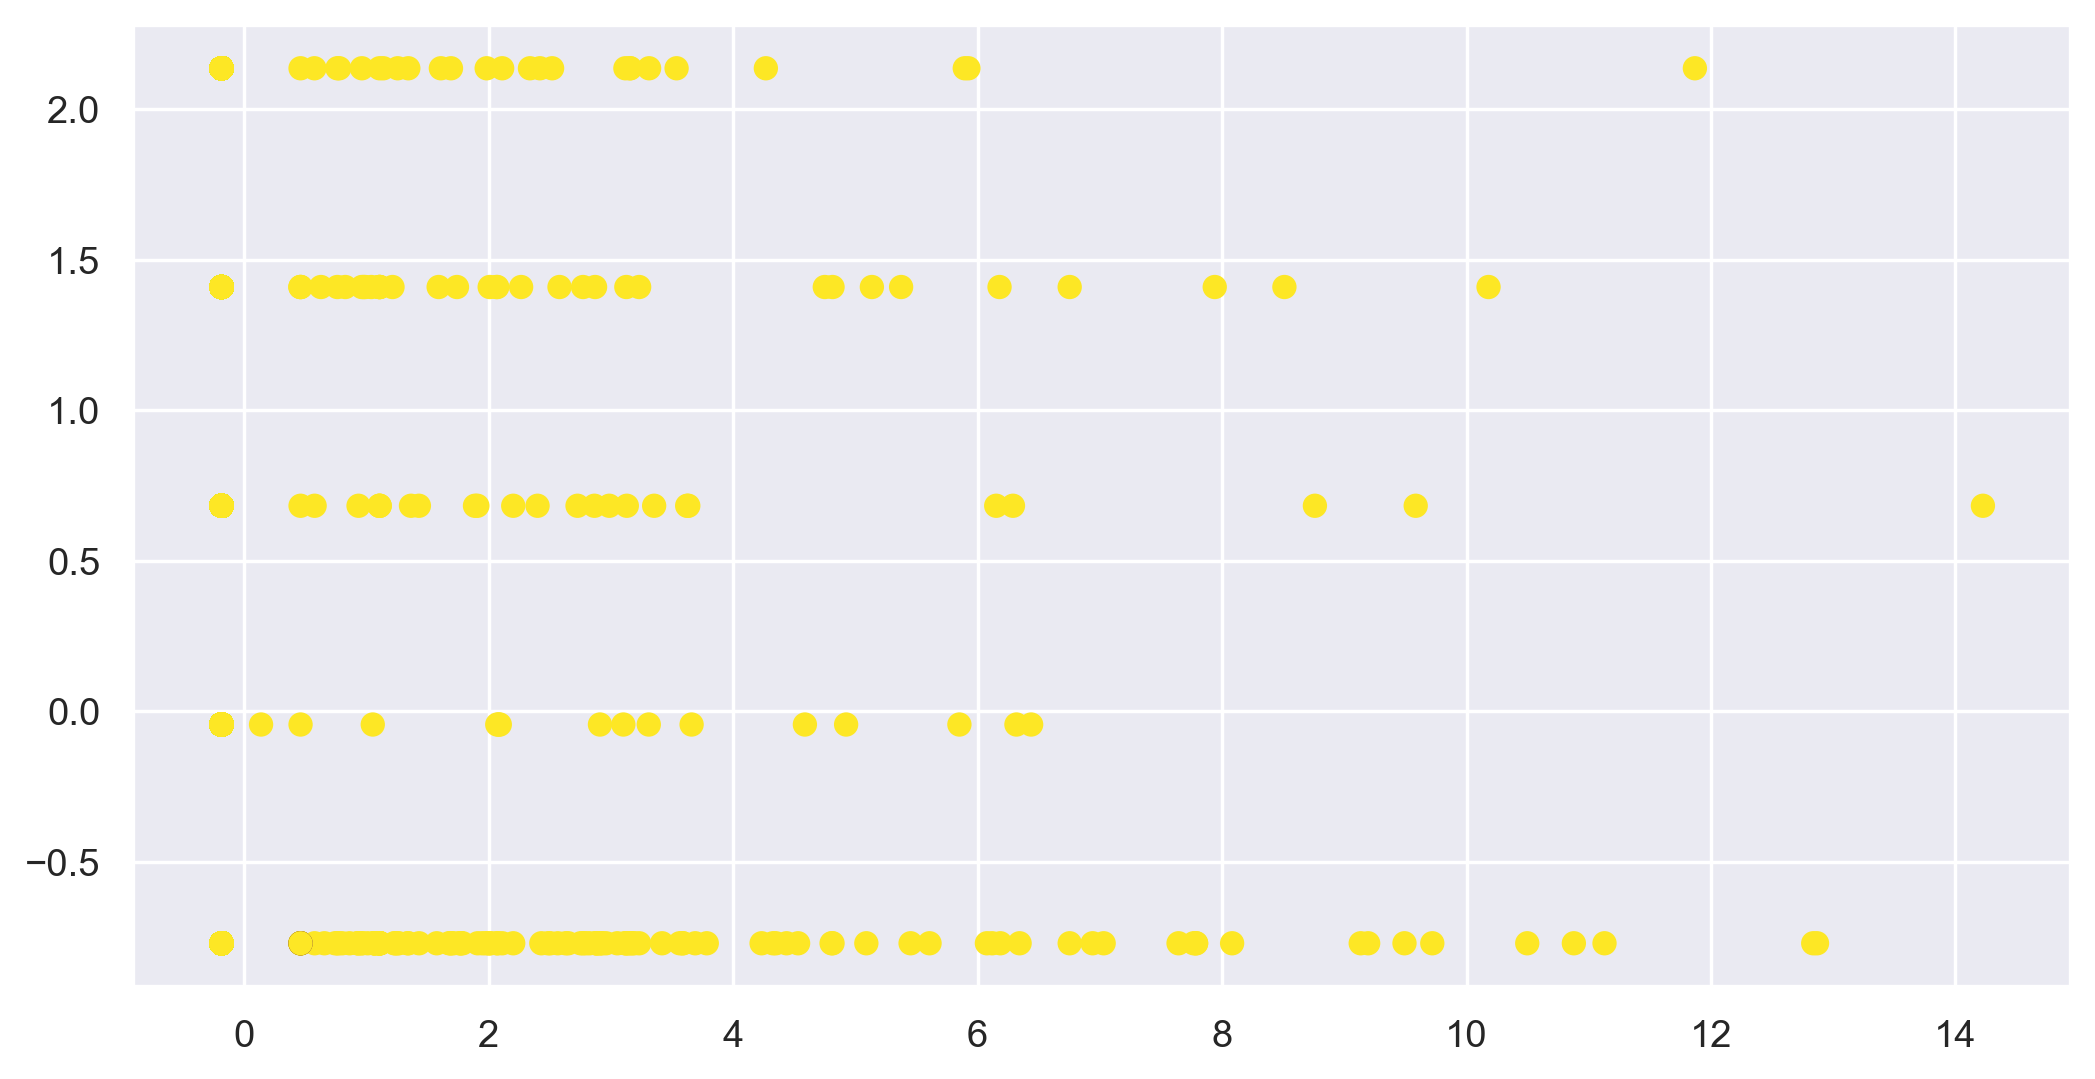

In [128]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='viridis')

In [130]:
df['Cluster'] = yp
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [132]:
df['Cluster'].unique()

array([ 0, -1], dtype=int64)

In [134]:
df[df['Cluster'] == -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,Cluster
3583,160114,500,1,1,1,71954,86,30817,53,1373,1,2,-1


In [136]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
Cluster,,,,,,,,,,,,
-1,160114.000000,500.000000,1.00000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.00000,1373.000000,1.000000,2.000000
0,73579.688594,144.025513,2.05978,1.014507,1.012256,17131.137069,11.583292,452.462731,1.36068,4119.246123,0.370185,0.409705


## above two clusters can be seen clearly where the Balance above 16000 and lower than 73000 ##